In [1]:
import sys
sys.path.append('../datagen/')
from mitchellschaeffer_parallel import MitchellSchaeffer
import numpy as np
import os

sys.path.append('../particle/')
from generate_particle_parallel import ODEParams

In [6]:
num_samples = 3
num_processes = 1
grid_size = (5,5)

In [11]:
parameters = ODEParams(T=500, dt=0.5, u0=[0.0, 0.0], theta=0.5, tol=1e-2)

MS = MitchellSchaeffer(
    eqtype="ODE",
    params=parameters,
    k=8,
    alpha=0.15,
    epsilon=0.01,
    I=0.125,
    gamma=0.1,
    grid_size=grid_size,
)
MS.generate_dataset_parallel(num_samples, num_processes, plot=False)

Program finished in 14.243356400053017 seconds


In [12]:
# Merge the generated samples into a single file
merged_data = []

for sample_id in range(num_samples):
    filename = f'sample_{sample_id}.npy'
    sample_data = np.load(filename)
    merged_data.append(sample_data)

merged_data = np.array(merged_data)

# Save the merged data to a single file
np.savez_compressed('../../dataset/merged_dataset.npz', my_data = merged_data)

In [ ]:
# Optionally, remove the individual sample files
for sample_id in range(num_samples):
    filename = f'sample_{sample_id}.npy'
    os.remove(filename)

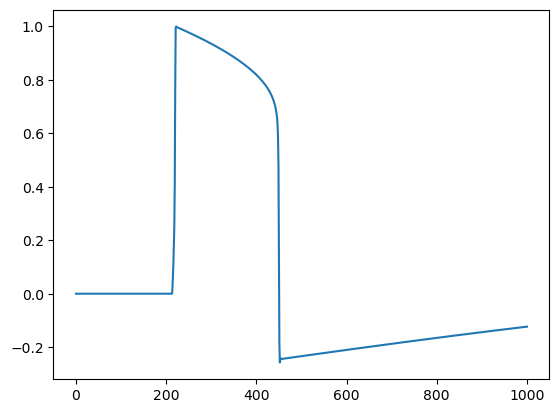

In [17]:
dataset = np.load('../../dataset/merged_dataset.npz')
data = dataset['my_data']
import matplotlib.pyplot as plt
# for i in range(100):
    # plt.imshow(data[0,10*i,:,:,0])
    # plt.colorbar()
    # plt.show()
plt.plot(data[0,:,1,1,0])
